# Latent Dirichlet Allocation (LDA)

![The Wonderful Wizard of Oz](https://www.gutenberg.org/files/55/55-h/images/cover.jpg)

> The Wonderful Wizard of Oz {cite:p}`Baum` via https://www.gutenberg.org/ebooks/55

To start our discussion, we should introduce what Topic Modeling is and how it can be applied. 

:::{note}
"Topic modeling is a princpled approach for discovering topics from a large corpus of text documents {cite:p}`liu2020sentiment` (pg.159)."
:::



Already, we have few things to unpack. What are the topics? How are they defined? Do we define or does the computer? What is a large corpus? How many documents do we need?


Let's start with a *large corpus of text documents*. Typically, we would have two documents 📄, five documents 📄, ten million documents 📄, can be thought of as our corpus. Yes, even 1 document 📄 can be used for topic modeling. So, defining, *large corpus of text documents*, can be subjective. 

As specified by Liu {cite:p}`liu2020sentiment`, we can start this conversation using one of the two basic types of topic modeling. This being *probabilistic Latent Dirichlet Allocation* or *Latent Dirichlet Allocation*. For our conversation, we will be using *Latent Dirichlet Allocation*. 





## Latent Dirichlet Allocation

### Pronunciation

#### Latent
<audio controls>
  <source src="https://github.com/dudaspm/LDA_Bias_Data/blob/main/audio/Latent.mp3?raw=true"
          type="audio/mp3">
Your browser does not support the audio element.
</audio>

#### Dirichlet
<audio controls>
  <source src="https://github.com/dudaspm/LDA_Bias_Data/blob/main/audio/Dirichlet.mp3?raw=true"
          type="audio/mp3">
Your browser does not support the audio element.
</audio>

#### Allocation
<audio controls>
  <source src="https://github.com/dudaspm/LDA_Bias_Data/blob/main/audio/Allocation.mp3?raw=true"
          type="audio/mp3">
Your browser does not support the audio element.
</audio>

Our pronunciation stems from a talk by David Blei who is a professor of Statistics and Computer Science at Columbia University during David's talk "Probabilistic Topic Models and User Behavior {cite:p}`Blei_2017`." The citation provides a link to original YouTube video (which is a *great* resource), but specifically, helpful for the pronunciation. 


## What is Latent Dirichlet Allocation or LDA?

LDA is an unsupervised learning model. 

:::{note}

Topic Modeling with Documents  📄           
            
* supervised - Our documents 📄 are pre-labeled with the given topic(s). We can then train 🏋️ and test 🧪 (and also, you can include validating). **Usually** this is split:
    * training 🏋️ 80% 
    * testing 🧪 20%. 
            
   
* unsupervised - Data is not labeled. So, we have no idea what the topics are beforehand. That being said, we can (and will) define the *number of topics*. 

:::


So, coming back to our original questions:
* What are topics? 
    * The topics will X number of sets of terms (we define this X) which will (could) have a common theme. 
* How are they defined? 
    * This is what we will get to in this notebook.     
* Do we define or does the computer? 
    * LDA is unsupervised, so we define the number of topics. The computer provides the topics themselves. 
* What is a large corpus? and How many documents do we need? 
    * A bit subjective here. There is a *great* discussion about this by Tang et al.  {cite:p}`tang2014understanding` regarding this. If you have a chance, read all the points, but to sum it up
        * The number of documents does matter, but at some point, increasing the number does not warrant better results. Even sampling 1000 papers from 1000000 papers could result in the same, if not better, results than 1000000 documents. 
        * The size of the documents also plays a role, so documents should not be short. Larger documents can be sampled and again receive the same desired output. 



### A Picture == 1000 Words

One of the best representations of what LDA is and how to utilize it, can be found in Blei's work *Probabilistic topic models* {cite:p}`blei2012probabilistic` Please note that images and figure text come directly from work. All credit should go to Blei {cite:p}`blei2012probabilistic`

![The intuitions behind latent Dirichlet allocation](http://deliveryimages.acm.org/10.1145/2140000/2133826/figs/f1.jpg)
"Figure 1. The intuitions behind latent Dirichlet allocation. We assume that some number of "topics," which are distributions over words, exist for the whole collection (far left). Each document is assumed to be generated as follows. First choose a distribution over the topics (the histogram at right); then, for each word, choose a topic assignment (the colored coins) and choose the word from the corresponding topic. The topics and topic assignments in this figure are illustrative—they are not fit from real data. {cite:p}`blei2012probabilistic` (Page 3)"

![Real inference with LDA](https://deliveryimages.acm.org/10.1145/2140000/2133826/figs/f2.jpg)
"Figure 2. Real inference with LDA. We fit a 100-topic LDA model to 17,000 articles from the journal Science. At left are the inferred topic proportions for the example article in Figure 1. At right are the top 15 most frequent words from the most frequent topics found in this article. {cite:p}`blei2012probabilistic` (Page 4)"

## Let's Try an Example

For our example, we will be using a subset of books from L. Frank Baum that are part of the public domain (again, thank you https://www.gutenberg.org).

* The Wonderful Wizard of Oz
    * https://www.gutenberg.org/files/55/55-h/55-h.htm
* The Marvellous Land of Oz
    * https://www.gutenberg.org/files/54/54-h/54-h.htm
* Ozma of Oz
    * https://www.gutenberg.org/files/33361/33361-h/33361-h.htm
* Dorothy and the Wizard in Oz 
    * https://www.gutenberg.org/files/22566/22566-h/22566-h.htm
* The Road to Oz
    * https://www.gutenberg.org/files/26624/26624-h/26624-h.htm # 

The books are all in the public domain, and the HTML can be found at https://www.gutenberg.org/.
We will go through one example of how to get the text from the book using Python. Please note, this will not be the most optimal way to do this, but we hope we can make the process clear for you to try with other books or manuscripts. 

### Get the HTML for the Book

We are going to use two libraries for this; one is a standard for Python called. 

```python
import urllib
```
the other is a favorite of ours, called beautiful soup {cite:p}`BeautifulSoup`. 

```python
from bs4 import BeautifulSoup
```

urllib will get the document, and BeautifulSoup makes it easy to parse. 

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.gutenberg.org/files/55/55-h/55-h.htm" 
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

Here we remove any CSS (style) or JavaScript (script)

In [2]:
for script in soup(["script", "style"]):
    script.extract()

Finally, get the text and add it to our document list. 

In [3]:
text = soup.get_text()
documents = []
documents.append(text)

In [4]:
text[:500]

'\n\n\n\n\nThe Project Gutenberg eBook of The Wonderful Wizard of Oz, by L. Frank Baum\n\n\n\n\nThe Project Gutenberg eBook of The Wonderful Wizard of Oz, by L. Frank Baum\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online\r\nat www.gutenberg.org. If you\r\nare not located in th'

In [5]:
len(text)

233238

We will repeat this process for the other four books. 

In [6]:
url = "https://www.gutenberg.org/files/54/54-h/54-h.htm" 
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = "https://www.gutenberg.org/files/33361/33361-h/33361-h.htm" 
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = "https://www.gutenberg.org/files/22566/22566-h/22566-h.htm" 
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = "https://www.gutenberg.org/files/26624/26624-h/26624-h.htm" 
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

In [7]:
len(documents)

5

### Create Tokens and Vocabulary

Now that we have our books, we need to tokenize the stories by word and then create a vocabulary out of these tokens. sklearn is a fantastic library that we will be using throughout the notebook {cite:p}`sklearn_api`.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
df = cv.fit_transform(documents)
vocab = cv.get_feature_names_out()

In [9]:
vocab

array(['00', '000', '10', ..., 'zoroaster', 'zuz', 'zy'], dtype=object)

Let's take a look at the tokens and the number of occurrence for the tokens. 

In [10]:
print(df.shape)

(5, 9143)


In [11]:
print(df[0])

  (0, 8068)	3198
  (0, 6153)	89
  (0, 3799)	99
  (0, 2714)	14
  (0, 5459)	976
  (0, 9001)	28
  (0, 8982)	44
  (0, 5594)	169
  (0, 1344)	119
  (0, 3400)	5
  (0, 893)	5
  (0, 8101)	196
  (0, 4377)	284
  (0, 3330)	354
  (0, 8580)	28
  (0, 593)	18
  (0, 596)	4
  (0, 4216)	544
  (0, 8508)	15
  (0, 7635)	19
  (0, 551)	1738
  (0, 5169)	24
  (0, 5546)	65
  (0, 5665)	2
  (0, 9034)	19
  :	:
  (0, 5610)	1
  (0, 2548)	1
  (0, 5049)	1
  (0, 404)	1
  (0, 8786)	1
  (0, 2064)	1
  (0, 1408)	1
  (0, 6144)	1
  (0, 5052)	1
  (0, 3880)	1
  (0, 5535)	1
  (0, 7087)	1
  (0, 6140)	1
  (0, 4809)	1
  (0, 5321)	1
  (0, 8692)	1
  (0, 1841)	1
  (0, 5288)	1
  (0, 2724)	1
  (0, 4884)	1
  (0, 5812)	1
  (0, 3041)	1
  (0, 6139)	1
  (0, 7816)	1
  (0, 5332)	1


The second number listed is the token number, and we use the vocab list to see what the actual word. An example would be to look at the first line. 

```python
(0, 8068) 3198
```
The 8074 token was used 3198 times. The 8068 token is:

In [12]:
print (vocab[8096])

third


Not that surprising, the word "the" is used that many times. 

:::{note}

Because there are many commonly used terms. We would want to remove these words from our dataset. These words are called *stopwords* and should be removed. We do showcase this later.  

:::

From here, we are actually at the point where we can run LDA.

There are much more than two inputs available for LDA, but we will focus on two. 
> Here are the other inputs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

The two we will focus on are:

* `n_components` - the number of topics, again, we need to specify this
* `doc_topic_prior` - Prior of document topic distribution theta (or also referred to as `alpha`. If the value is None, defaults to 1 / n_components. Alpha
* `topic_word_prior` - topic-word prior. Normally a number much less than 1, e.g. 0.001, to strongly prefer sparse word distributions, i.e. few words per topic.


Alpha and Beta Hyperparameters – alpha represents document-topic density and Beta represents topic-word density. Higher the value of alpha, documents are composed of more topics and lower the value of alpha, documents contain fewer topics. On the other hand, higher the beta, topics are composed of a large number of words in the corpus, and with the lower value of beta, they are composed of few words.

Number of Topics – Number of topics to be extracted from the corpus. Researchers have developed approaches to obtain an optimal number of topics by using Kullback Leibler Divergence Score. 

Number of Topic Terms – Number of terms composed in a single topic. It is generally decided according to the requirement. If the problem statement talks about extracting themes or concepts, it is recommended to choose a higher number, if problem statement talks about extracting features or terms, a low number is recommended.

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 5, doc_topic_prior=1)
lda.fit(df)

LatentDirichletAllocation(doc_topic_prior=1, n_components=5)

For the n-dimensional array `arr`:
`argsort()` returns a ranked n-dimensional array of arr, call it "ranked_array" which contains the indices that would sort arr in a descending fashion for the ith element in ranked_array, ranked_array[i] represents the index of the
element in arr that should be at the ith index in ranked_array.

Example: 
```python
arr = [3,7,1,0,3,6]
np.argsort(arr) = [3, 2, 0, 4, 5, 1] => gives index
```
In this example, `arr[3]` should be ranked 1st, `arr[2]` should be ranked 2nd, `arr[0]` should be ranked 3rd, ... and `arr[1]` should be ranked last.
`word_idx` contains the indices in "topic" of the top num_top_words most relevant to a given topic. It is sorted ascending to begin with and then reversed (desc. now)    

In [14]:
lda.components_[0].shape

(9143,)

In [15]:
import numpy as np 
topic_words = {}
n_top_words = 10
for topic, comp in enumerate(lda.components_):
    # print(topic, comp)
    word_idx = np.argsort(comp)[::-1][:n_top_words] #argsort to get index, and [::-1] to sort in descending
    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]
    # break
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  jinjur, tent, insect, whoa, chalk, mask, squirrels, locks, spicy, whined
Topic: 1
  jinjur, tent, insect, whoa, chalk, mask, squirrels, locks, spicy, whined
Topic: 2
  the, and, to, of, in, you, that, it, was, he
Topic: 3
  the, and, to, of, in, you, was, he, it, that
Topic: 4
  jinjur, tent, insect, whoa, chalk, mask, squirrels, locks, spicy, whined


In [16]:
len(lda.components_)

5

Looking at this, we do not get a clear picture of the topics. This time, let's remove those stopwords and see how important 🧼cleaning the data can be🧼! 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# we can add this to the tokenization step
cv = CountVectorizer(stop_words='english')
df = cv.fit_transform(documents)
vocab = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 4, doc_topic_prior=1)
lda.fit(df)

LatentDirichletAllocation(doc_topic_prior=1, n_components=4)

In [19]:
topic_words = {}
n_top_words = 20
for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  dorothy, said, scarecrow, woodman, lion, oz, great, tin, little, witch, asked, green, came, good, gutenberg, girl, toto, head, project, shall
Topic: 1
  headlong, parting, attended, smoothing, add, sinking, courageous, holiday, slim, gives, fought, stillness, emptied, sobbed, warmed, dogs, ringing, halfway, ermine, worries
Topic: 2
  said, scarecrow, dorothy, tip, pg, king, tin, woodman, horse, gutenberg, ozma, little, project, girl, jack, asked, saw, good, head, billina
Topic: 3
  dorothy, said, man, wizard, little, shaggy, pg, asked, bright, ozma, gutenberg, button, project, oz, like, jim, don, time, good, people


Much better!

#Twitter (Kaggle Data) - General

Dataset Link: https://umkc.box.com/s/k9fpx5gr1nyrpv1f2ts2hywf3796o7m9

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
tweet_df = pd.read_csv('/content/drive/MyDrive/KDN-ICP-6/training.1600000.processed.noemoticon.csv', encoding = 'latin-1', header = None, 
                       names = ['target', 'ids', 'date', 'flag', 'user', 'text'])

In [24]:
sub_tweet_df = tweet_df.sample(n = 10000, random_state = 5100)

In [25]:
sub_tweet_df.head()

,target,ids,date,flag,user,text
1139115,4,1976903218,Sat May 30 19:30:09 PDT 2009,NO_QUERY,tamsul,@jaceypants Nope it's not goodbye because I'll...
1487230,4,2068237882,Sun Jun 07 13:44:15 PDT 2009,NO_QUERY,Nadiabc,here we go again... 5 days left
605873,0,2222400745,Thu Jun 18 06:55:54 PDT 2009,NO_QUERY,rumtumtaggle,@kittodaijoubu aw that person is obviously a ...
933794,4,1792114607,Wed May 13 22:09:42 PDT 2009,NO_QUERY,Alexandreaaa,@TheRealJordin .. get your armor lalala.. lov...
45752,0,1677236711,Sat May 02 01:04:36 PDT 2009,NO_QUERY,casamera,@selassieanwar sorry but you're blog isn't sh...


In [26]:
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words = 'english')
tfidf_tokens = tfidf_vect.fit_transform(sub_tweet_df['text'])


In [27]:
tfidf_vocab = tfidf_vect.get_feature_names_out()

In [28]:
print(tfidf_tokens[0])
tfidf_vocab[6678]

  (0, 9633)	0.31144307222209955
  (0, 6678)	0.5131316913515381
  (0, 11547)	0.489997082186444
  (0, 8149)	0.6321407592809857


'goodbye'

In [29]:
lda = LatentDirichletAllocation(n_components = 10, doc_topic_prior=1)
lda.fit(tfidf_tokens)

LatentDirichletAllocation(doc_topic_prior=1)

In [30]:
topic_words = {}
n_top_words = 10
for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    # store the words most relevant to the topic
    topic_words[topic] = [tfidf_vocab[i] for i in word_idx]
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  http, love, just, monday, finally, hi, don, quot, com, really
Topic: 1
  good, don, ready, today, weekend, just, think, got, sleep, quot
Topic: 2
  good, days, day, nice, going, come, way, awesome, tomorrow, just
Topic: 3
  twitpic, friends, love, http, cute, little, com, good, end, time
Topic: 4
  just, quot, like, morning, going, want, car, missing, work, help
Topic: 5
  tweet, time, bored, glad, watch, bad, hair, enjoy, work, post
Topic: 6
  work, like, girl, gonna, know, just, run, beach, need, reply
Topic: 7
  day, thanks, hurts, going, ugh, work, excited, hahaha, taking, just
Topic: 8
  work, just, tired, today, funny, eating, gotta, late, going, long
Topic: 9
  hot, thank, day, today, good, new, want, oh, use, lovely


#Twitter (Kaggle Data) - Mixed (general + politics + sports)


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
tweet_df_politics_1 = pd.read_csv('/content/drive/MyDrive/KDN-ICP-6/hashtag_joebiden.csv').dropna()
tweet_df_politics_2 = pd.read_csv('/content/drive/MyDrive/KDN-ICP-6/hashtag_donaldtrump.csv', engine='python').dropna()
tweet_df_sport = pd.read_csv('/content/drive/MyDrive/KDN-ICP-6/tokyo_2020_tweets.csv').dropna()


tweet_df_general = pd.read_csv('/content/drive/MyDrive/KDN-ICP-6/training.1600000.processed.noemoticon.csv', encoding = 'latin-1', header = None, 
                       names = ['target', 'ids', 'date', 'flag', 'user', 'text'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
tweet_df_sport.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0,0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0,0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0,0,False
5,1418885092571766792,Sab Joke H,India,Follows you,2020-09-05 19:50:35,107,88,102,False,2021-07-24 10:45:42,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,"['Tokyo2020', 'Olympics', 'MirabaiChanu', 'Wei...",Twitter for Android,0,0,False
8,1418889399081656321,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103976,2724,36554,True,2021-07-24 11:02:49,Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...,"['Tokyo2020', 'CANvGER']",Twitter Web App,0,0,False


In [35]:
sub_tweet_df_1 = tweet_df_politics_1.sample(n = 2000)
sub_tweet_df_1['text'] = sub_tweet_df_1['tweet']
sub_tweet_df_2 = tweet_df_politics_2.sample(n = 2000)
sub_tweet_df_2['text'] = sub_tweet_df_2['tweet']
sub_tweet_df_3 = tweet_df_general.sample(n = 10000)
sub_tweet_df_4 = tweet_df_sport.sample(n = 5000)



In [36]:
all_sub_tweets_df = pd.concat([sub_tweet_df_1['text'], sub_tweet_df_2['text'], sub_tweet_df_3['text'], sub_tweet_df_4['text']]).to_frame(name = 'text')
all_sub_tweets_df.head()

,text
126666,Turning the opponents microphone off during th...
94325,@BarackObama powerful message in PA is what Am...
182526,Trump has started ZERO new wars.\n\nWages have...
136349,#Debate #Debates2020 #DebateTonight #Biden #Bi...
33816,You have to see this. #Biden with his massive ...


In [37]:
all_sub_tweets_df[15000:]

,text
14375,It was a different kind of game for #TeamGB ag...
1796,Congratulations #MirabaiChanu for achieving th...
11542,What’s this place called Taipei? #Tokyo2020
1043,Congratulations to #MirabaiChanu for winning I...
7510,Romanian women win in tenis in #Tokyo2020 🙏😍 h...
...,...
14816,90+3' | Another own goal by New Zealand \n\n🇺🇸...
15293,What a dream come true for India! Thank you fo...
14533,Off to a flying start! Huge congratulations to...
5978,@PuneethRajkumar @mirabai_chanu Boss\n\n#Dvitv...


In [38]:
all_sub_tweets_df.size

19000

## Fitting

In [39]:
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words = 'english', max_df = 0.7)
tfidf_tokens = tfidf_vect.fit_transform(all_sub_tweets_df['text'])
# tfidf_tokens = tfidf_vect.fit_transform(all_sub_tweets_df['text_tokenized']) #if you have some custom cleaning function

tfidf_vocab = tfidf_vect.get_feature_names_out()

In [40]:
print(tfidf_tokens[:2])
tfidf_vocab[9566]

  (0, 1725)	0.32037648579889694
  (0, 16598)	0.0698788357328233
  (0, 5015)	0.1724305465522068
  (0, 35366)	0.24475666879637148
  (0, 4986)	0.10745589972157002
  (0, 9546)	0.18685007091373343
  (0, 35395)	0.22836192147722534
  (0, 27394)	0.21208256365060635
  (0, 29490)	0.16408995425466316
  (0, 3019)	0.1372114088252266
  (0, 30193)	0.1835960618040914
  (0, 38490)	0.15035527017542386
  (0, 21048)	0.16142936265056998
  (0, 39196)	0.18218527454240147
  (0, 28683)	0.24622371996794323
  (0, 34328)	0.26962139161450344
  (0, 16912)	0.20870910018175892
  (0, 14813)	0.13226905714819304
  (0, 20834)	0.13376117891399802
  (0, 22928)	0.20365254829897594
  (0, 22766)	0.29851745653087153
  (0, 25467)	0.29851745653087153
  (0, 35621)	0.25683467919054226
  (1, 37266)	0.27256044695304293
  (1, 4995)	0.32579506017212717
  (1, 37254)	0.16504548729167934
  (1, 37283)	0.2448441966020756
  (1, 9439)	0.20783969188391635
  (1, 204)	0.2380797112518789
  (1, 27392)	0.24908134083022815
  (1, 3610)	0.34626588500

'deborshi'

In [41]:
lda = LatentDirichletAllocation(n_components = 10, doc_topic_prior = 1, topic_word_prior= 0.01)
lda.fit(tfidf_tokens)

LatentDirichletAllocation(doc_topic_prior=1, topic_word_prior=0.01)

In [42]:
topic_words = {}
n_top_words = 15
for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    # store the words most relevant to the topic
    topic_words[topic] = [tfidf_vocab[i] for i in word_idx]
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  tokyo2020, https, medal, trump, india, just, mirabaichanu, biden, right, got, makes, seen, better, weeks, olympics
Topic: 1
  tokyo2020, https, congratulations, medal, india, mirabaichanu, mirabai_chanu, olympics, proud, winning, trump, silver, weightlifting, heartiest, biden
Topic: 2
  quot, today, tokyo2020, like, banda, just, https, trump, yes, biden, birthday, tweet, pretty, bed, zambia
Topic: 3
  https, tokyo2020, trump, biden, good, joebiden, new, just, day, aus, puneethrajkumar, lunch, like, doing, need
Topic: 4
  tokyo2020, https, just, joebiden, want, time, don, football, biden, like, game, trump, try, hate, yulo
Topic: 5
  https, tokyo2020, trump, olympics, work, biden, joebiden, day, beach, going, just, tennis, thank, home, don
Topic: 6
  tokyo2020, olympics, https, really, great, good, tomorrow, com, http, just, sleep, day, today, time, weather
Topic: 7
  https, tokyo2020, know, trump, im, love, bad, got, house, olympics, playing, joebiden, good, just, day
Topic:



```
Topic: 0
  tokyo2020, https, olympics, good, trump, amp, love, today, time, just, like, china, great, know, http
Topic: 1
  tokyo2020, https, day, olympics, trump, miss, want, http, just, good, com, don, biden, got, love
Topic: 2
  tokyo2020, https, olympics, trump, home, like, really, just, joebiden, biden, know, time, love, medal, going
Topic: 3
  tokyo2020, https, joebiden, olympics, biden, congratulations, hidilyn, trump, good, great, day, today, hate, badminton, going
Topic: 4
  https, tokyo2020, work, trump, today, good, biden, just, got, morning, time, day, sick, tomorrow, days
Topic: 5
  tokyo2020, https, just, like, don, lol, good, quot, love, trump, know, day, time, work, http
Topic: 6
  tokyo2020, day, https, just, olympics, good, school, happy, oh, quot, going, work, love, time, morning
Topic: 7
  tokyo2020, https, olympics, gold, hockey, just, team, watching, india, olympicgames, men, tokyoolympics, good, medal, women
Topic: 8
  tokyo2020, https, just, trump, going, olympics, day, good, time, biden, today, http, lol, like, rain
Topic: 9
  tokyo2020, https, trump, biden, olympics, just, like, love, quot, joebiden, day, thanks, amp, boxing, going
```



After some cleaning:
```
Topic: 0
  watch, welcome, trump, good, biden, today, girl, olympic, day, need, follower, work, bored, ugh, make
Topic: 1
  yes, olympic, new, win, swim, trump, titmus, gold, medal, think, make, biden, great, today, know
Topic: 2
  gold, olympic, hidilyn, medal, teamgb, win, diaz, like, olympicgame, philippine, congratulation, congrat, know, woman, tokyoolympic
Topic: 3
  thank, day, work, good, sleep, school, like, think, today, trump, time, happy, wake, tomorrow, know
Topic: 4
  congratulation, proud, mirabaichanu, home, medal, silver, india, make, sad, feel, really, win, olympic, day, today
Topic: 5
  joebiden, biden, trump, olympic, donaldtrump, love, awesome, president, good, new, win, lol, time, bad, need
Topic: 6
  olympic, come, usa, cool, watch, want, wait, day, suck, time, hey, look, basketball, archery, work
Topic: 7
  olympic, hockey, india, wish, game, teamindia, win, team, let, good, man, tokyoolympic, rain, day, match
Topic: 8
  sorry, tweet, lol, love, trump, good, birthday, day, time, look, thank, happy, need, reply, think
Topic: 9
  good, trump, biden, love, miss, morning, time, vote, know, great, want, day, make, lol, weekend
```

## Assignment: 
- Find a way to make topics more clear cut. (Cleaning, Stemming words, Removing Redundancy, ...)


# cleaning

In [43]:
all_sub_tweets_df

,text
126666,Turning the opponents microphone off during th...
94325,@BarackObama powerful message in PA is what Am...
182526,Trump has started ZERO new wars.\n\nWages have...
136349,#Debate #Debates2020 #DebateTonight #Biden #Bi...
33816,You have to see this. #Biden with his massive ...
...,...
14816,90+3' | Another own goal by New Zealand \n\n🇺🇸...
15293,What a dream come true for India! Thank you fo...
14533,Off to a flying start! Huge congratulations to...
5978,@PuneethRajkumar @mirabai_chanu Boss\n\n#Dvitv...


In [44]:
all_sub_tweets_df['text'] = all_sub_tweets_df['text'].str.strip().replace("\n", " ").replace("\r", " ")
all_sub_tweets_df['text'] = all_sub_tweets_df['text'].str.lower()
all_sub_tweets_df['text'] = all_sub_tweets_df['text'].str.strip().replace("#", "").replace("@", "")
all_sub_tweets_df

,text
126666,turning the opponents microphone off during th...
94325,@barackobama powerful message in pa is what am...
182526,trump has started zero new wars.\n\nwages have...
136349,#debate #debates2020 #debatetonight #biden #bi...
33816,you have to see this. #biden with his massive ...
...,...
14816,90+3' | another own goal by new zealand \n\n🇺🇸...
15293,what a dream come true for india! thank you fo...
14533,off to a flying start! huge congratulations to...
5978,@puneethrajkumar @mirabai_chanu boss\n\n#dvitv...


In [45]:
all_sub_tweets_df.size

19000

# Stemming

In [46]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
# Use English stemmer.
stemmer = SnowballStemmer("english")
porter = PorterStemmer()
all_sub_tweets_df_stem = all_sub_tweets_df['text'].apply(lambda x: [porter.stem(y) for y in x]) # Stem every word.
all_sub_tweets_df_stem

126666    [t, u, r, n, i, n, g,  , t, h, e,  , o, p, p, ...
94325     [@, b, a, r, a, c, k, o, b, a, m, a,  , p, o, ...
182526    [t, r, u, m, p,  , h, a, s,  , s, t, a, r, t, ...
136349    [#, d, e, b, a, t, e,  , #, d, e, b, a, t, e, ...
33816     [y, o, u,  , h, a, v, e,  , t, o,  , s, e, e, ...
                                ...                        
14816     [9, 0, +, 3, ',  , |,  , a, n, o, t, h, e, r, ...
15293     [w, h, a, t,  , a,  , d, r, e, a, m,  , c, o, ...
14533     [o, f, f,  , t, o,  , a,  , f, l, y, i, n, g, ...
5978      [@, p, u, n, e, e, t, h, r, a, j, k, u, m, a, ...
9526      [s, a, m,  , k, e, r, r,  , i, s,  , l, e, g, ...
Name: text, Length: 19000, dtype: object

Stemming did not work well

# Fitting

In [47]:
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words = 'english', max_df = 0.7)
tfidf_tokens = tfidf_vect.fit_transform(all_sub_tweets_df['text'])
# tfidf_tokens = tfidf_vect.fit_transform(all_sub_tweets_df['text_tokenized']) #if you have some custom cleaning function

tfidf_vocab = tfidf_vect.get_feature_names_out()

In [48]:
print(tfidf_tokens)

  (0, 1725)	0.32037648579889694
  (0, 16598)	0.0698788357328233
  (0, 5015)	0.1724305465522068
  (0, 35366)	0.24475666879637148
  (0, 4986)	0.10745589972157002
  (0, 9546)	0.18685007091373343
  (0, 35395)	0.22836192147722534
  (0, 27394)	0.21208256365060635
  (0, 29490)	0.16408995425466316
  (0, 3019)	0.1372114088252266
  (0, 30193)	0.1835960618040914
  (0, 38490)	0.15035527017542386
  (0, 21048)	0.16142936265056998
  (0, 39196)	0.18218527454240147
  (0, 28683)	0.24622371996794323
  (0, 34328)	0.26962139161450344
  (0, 16912)	0.20870910018175892
  (0, 14813)	0.13226905714819304
  (0, 20834)	0.13376117891399802
  (0, 22928)	0.20365254829897594
  (0, 22766)	0.29851745653087153
  (0, 25467)	0.29851745653087153
  (0, 35621)	0.25683467919054226
  (1, 37266)	0.27256044695304293
  (1, 4995)	0.32579506017212717
  :	:
  (18997, 16608)	0.35664018040103335
  (18997, 8179)	0.23453153722941647
  (18997, 32563)	0.2921967826810603
  (18997, 38260)	0.269606232843698
  (18997, 16598)	0.1175089557245505

In [49]:
print(tfidf_tokens[:2])
tfidf_vocab[9566]

  (0, 1725)	0.32037648579889694
  (0, 16598)	0.0698788357328233
  (0, 5015)	0.1724305465522068
  (0, 35366)	0.24475666879637148
  (0, 4986)	0.10745589972157002
  (0, 9546)	0.18685007091373343
  (0, 35395)	0.22836192147722534
  (0, 27394)	0.21208256365060635
  (0, 29490)	0.16408995425466316
  (0, 3019)	0.1372114088252266
  (0, 30193)	0.1835960618040914
  (0, 38490)	0.15035527017542386
  (0, 21048)	0.16142936265056998
  (0, 39196)	0.18218527454240147
  (0, 28683)	0.24622371996794323
  (0, 34328)	0.26962139161450344
  (0, 16912)	0.20870910018175892
  (0, 14813)	0.13226905714819304
  (0, 20834)	0.13376117891399802
  (0, 22928)	0.20365254829897594
  (0, 22766)	0.29851745653087153
  (0, 25467)	0.29851745653087153
  (0, 35621)	0.25683467919054226
  (1, 37266)	0.27256044695304293
  (1, 4995)	0.32579506017212717
  (1, 37254)	0.16504548729167934
  (1, 37283)	0.2448441966020756
  (1, 9439)	0.20783969188391635
  (1, 204)	0.2380797112518789
  (1, 27392)	0.24908134083022815
  (1, 3610)	0.34626588500

'deborshi'

# Applying LDA

In [50]:
lda = LatentDirichletAllocation(n_components = 10, doc_topic_prior = 0.01, topic_word_prior= 0.001)
lda.fit(tfidf_tokens)

LatentDirichletAllocation(doc_topic_prior=0.01, topic_word_prior=0.001)

In [51]:
topic_words = {}
n_top_words = 15
for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    # store the words most relevant to the topic
    topic_words[topic] = [tfidf_vocab[i] for i in word_idx]
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  https, trump, just, tokyo2020, good, looking, today, biden, like, think, joebiden, day, work, really, woke
Topic: 1
  tokyo2020, https, kerr, banda, olympics, sam, trump, puneethrajkumar, swevaus, biden, penalty, matildas, yulo, tokyoolympics, good
Topic: 2
  trump, biden, https, joebiden, vote, election2020, tokyo2020, realdonaldtrump, just, bidenharris2020, amp, trump2020, election, electionday, america
Topic: 3
  tokyo2020, https, medal, congratulations, india, silver, mirabaichanu, mirabai_chanu, olympics, proud, winning, weightlifting, mirabai, women, tokyoolympics
Topic: 4
  https, tokyo2020, trump, joebiden, day, biden, olympics, vikas, just, boxing, http, today, com, night, good
Topic: 5
  tokyo2020, https, just, uswnt, goal, trump, love, day, quot, like, football, olympics, new, going, know
Topic: 6
  https, tokyo2020, work, quot, trump, biden, just, love, day, going, school, today, time, tired, joebiden
Topic: 7
  good, tokyo2020, morning, https, day, like, just, g

# Assignment: Reddit API

- Define your own topics and select a few popular threads from those topics on Reddit
- Retrieve the comment data using Praw API
- Group comments together as one corpus
- Perform Topic Modeling using LDA with various `n` topics.


In [52]:
 !pip install praw
!pip install asyncpraw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 5.0 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 183 kB 4.9 MB/s 


How to get Client ID and Secret for Reddit API: https://www.youtube.com/watch?v=4Lmfgw4RZCM

Create a new app and put some sample redirect URI and callback. 

In [53]:
import praw
#import asyncpraw as praw
from asyncpraw.models import MoreComments
reddit = praw.Reddit(
    user_agent="icp6",
    client_id="mj0MooumrU-UuM5CIw5NTQ",
    client_secret="sDjVxLtRSryKvjvTbSLMbowsm7mMYQ",
    redirect_uri='http://127.0.0.1:65010/'
                                # 'authorize_callback'
    # username="USERNAME",
    # password="PASSWORD"
)

In [54]:
import time
from tqdm.notebook import tqdm
topic_library = {
    'Bitcoin' : [ 'https://www.reddit.com/r/Bitcoin/comments/xotd46/weird_feeling_about_the_next_23_years/', 
                  'https://www.reddit.com/r/Bitcoin/comments/xo8vbn/the_british_pound_is_falling_against_bitcoin/',
                  'https://www.reddit.com/r/Bitcoin/comments/xofu41/bonds_collapsing_in_fiat_terms_fiat_collapsing_in/'],
    'AI': [
        'https://www.reddit.com/r/facepalm/comments/xle19o/texasbased_religiousright_activist_and_doctor/',
        'https://www.reddit.com/r/polls/comments/xkcpsy/if_there_was_an_artificial_intelligence_that/',
        'https://www.reddit.com/r/metaverse/comments/r135ea/5_jobs_that_will_exist_in_the_metaverse_how_to/',
    ],
    'COVID': [
        'https://www.reddit.com/r/COVID19positive/comments/jnmdxw/remember_to_tell_your_loved_ones_you_love_them/',
        'https://www.reddit.com/r/depression/comments/jnbcpf/im_so_lost_and_want_to_die_everyday/', 
        'https://www.reddit.com/r/COVID19_support/comments/jnjj18/the_virus_getting_closer_to_home_but_not/',
        'https://www.reddit.com/r/COVID19_support/comments/jnf6l1/at_this_point_it_feels_like_my_mental_health_is/',
        'https://www.reddit.com/r/COVID19_support/comments/jm80cw/i_cant_do_this_until_2022/',
    ]
}
for topic, urls in tqdm(topic_library.items()):
  for url in tqdm(urls):
    submission = reddit.submission(url=url)
    submission.comments.replace_more(limit=0) # flatten tree
    all_comments = []
    comments = submission.comments # all comments
    # comments = submission.comments.list() # all comments
    for top_level_comment in submission.comments:
      if isinstance(top_level_comment, MoreComments):
          continue
      all_comments.append(top_level_comment.body)
      with open('{}-reddit_author.txt'.format(topic), 'a') as f:
          f.write(submission.selftext + '\n')
      with open('{}-reddit_comments.txt'.format(topic), 'a') as f:
        for i, comment in enumerate(comments):
          f.write(comment.body + '\n')
    # time.sleep(1.5)
    
  

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  0%|          | 0/3 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  0%|          | 0/5 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [55]:
import shutil
for topic, _ in tqdm(topic_library.items()):
  shutil.copy2('{}-reddit_author.txt'.format(topic), '/content/drive/MyDrive/KDN-ICP-6')
  shutil.copy2('{}-reddit_comments.txt'.format(topic), '/content/drive/MyDrive/KDN-ICP-6')

  0%|          | 0/3 [00:00<?, ?it/s]

In [56]:
import praw
#import asyncpraw as praw
from asyncpraw.models import MoreComments
reddit = praw.Reddit(
    user_agent="icp6",
    client_id="mj0MooumrU-UuM5CIw5NTQ",
    client_secret="sDjVxLtRSryKvjvTbSLMbowsm7mMYQ",
    redirect_uri='http://127.0.0.1:65010/'
                                # 'authorize_callback'
    # username="USERNAME",
    # password="PASSWORD"
)

In [57]:
import time
from tqdm.notebook import tqdm
topic_library = {
    'Politics' : [ 'https://www.reddit.com/r/news/comments/x6jyk9/judge_grants_trumps_request_for_a_special_master/', 
    'https://www.reddit.com/r/politics/comments/x3o3hs/biden_lambastes_maga_republicans_in_rare_prime/',
    'https://www.reddit.com/r/pics/comments/wwoqvg/op_apparently_you_have_to_take_your_political/'],
    'Literature': [
        'https://www.reddit.com/r/gaming/comments/vy8elo/i_am_an_english_teacher_teaching_a_video_game_as/',
    'https://www.reddit.com/r/nursing/comments/xnqdm8/aita_nursing_edition_told_a_coworker_handing_out/',
    'https://www.reddit.com/r/NoStupidQuestions/comments/wyzgrh/why_were_jews_illtreated_not_just_hitler_and/',
    ],
    'Astronomy': [
         'https://www.reddit.com/r/DestinyLore/comments/xippjd/i_cant_take_it_anymore_sit_down_we_are_learning/',
    'https://www.reddit.com/r/iphone/comments/xd53d5/astronomy_lockscreen_on_ios_16_not_only_shows_you/', 
    'https://www.reddit.com/r/space/comments/w9osfq/a_new_law_is_putting_astronomy_back_in_the_hands/',
    "https://www.reddit.com/r/space/comments/wv7ywb/hawaii_seeks_end_to_strife_over_astronomy_on/",
    "https://www.reddit.com/r/Astronomy/comments/wg6596/i_was_asked_to_give_a_short_lecture_about/",
    "https://www.reddit.com/r/DetailCraft/comments/xaiwb9/interior_details_astronomy_lab/",
    
    ]
}
for topic, urls in tqdm(topic_library.items()):
  for url in tqdm(urls):
    submission = reddit.submission(url=url)
    submission.comments.replace_more(limit=0) # flatten tree
    all_comments = []
    comments = submission.comments # all comments
    # comments = submission.comments.list() # all comments
    for top_level_comment in submission.comments:
      if isinstance(top_level_comment, MoreComments):
          continue
      all_comments.append(top_level_comment.body)
      with open('{}-reddit_author.txt'.format(topic), 'a') as f:
          f.write(submission.selftext + '\n')
      with open('{}-reddit_comments.txt'.format(topic), 'a') as f:
        for i, comment in enumerate(comments):
          f.write(comment.body + '\n')
    # time.sleep(1.5)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  0%|          | 0/3 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  0%|          | 0/6 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [58]:
import shutil
for topic, _ in tqdm(topic_library.items()):
  shutil.copy2('{}-reddit_author.txt'.format(topic), '/content/drive/MyDrive/KDN-ICP-6')
  shutil.copy2('{}-reddit_comments.txt'.format(topic), '/content/drive/MyDrive/KDN-ICP-6')

  0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
reddit_df = pd.DataFrame(columns = ['text'])
for topic, _ in tqdm(topic_library.items()):
  with open('{}-reddit_comments.txt'.format(topic)) as f:
    lines = f.readlines()
    reddit_sub_df = pd.DataFrame(lines, columns = ['text'])
    reddit_sub_df = reddit_sub_df.sample(3000)
    reddit_df= reddit_df.append(reddit_sub_df).reset_index(drop=True)
# lines

  0%|          | 0/3 [00:00<?, ?it/s]

In [60]:
reddit_df

,text
0,Every time he said “MAGA” I think “Nazi”. Beca...
1,\n
2,"As a reminder, this subreddit [is for civil di..."
3,\n
4,Well done\n
...,...
8995,"If it was an oil well, I'd have sympathy. But ..."
8996,The time font is hideous. Anyone know how to c...
8997,Nessus is an unstable centaur that passes thro...
8998,\n


In [61]:
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words = 'english', max_df = 0.7)
tfidf_tokens = tfidf_vect.fit_transform(reddit_df['text'])


In [62]:
tfidf_vocab = tfidf_vect.get_feature_names_out()

In [63]:
print(tfidf_tokens[0])
tfidf_vocab[100]

  (0, 3138)	0.620731630301779
  (0, 4765)	0.362998142516076
  (0, 2858)	0.4341401384481422
  (0, 4121)	0.4117054885272026
  (0, 4800)	0.35347633948763757


'absolute'

In [64]:
lda = LatentDirichletAllocation(n_components = 10, doc_topic_prior=1)
lda.fit(tfidf_tokens)

LatentDirichletAllocation(doc_topic_prior=1)

In [65]:
import numpy as np 
topic_words = {}
n_top_words = 15
for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    # store the words most relevant to the topic
    topic_words[topic] = [tfidf_vocab[i] for i in word_idx]
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  battery, trump, don, republicans, drain, appointed, nta, religious, white, want, live, reason, deleted, 10, attack
Topic: 1
  think, removed, love, gonna, say, feel, country, beach, ll, op, oh, going, using, fuck, flags
Topic: 2
  people, ve, culture, way, tmt, year, telling, happened, thought, telescopes, right, hawaiians, awesome, science, says
Topic: 3
  fucking, space, judge, comments, dot, question, green, location, don, usage, real, stub, w9osfq, just, society
Topic: 4
  asshole, like, lock, does, know, screen, politics, small, stupid, probably, said, people, identity, kind, look
Topic: 5
  removed, know, hate, like, time, lol, shit, maga, non, hand, native, big, building, trump, hands
Topic: 6
  removed, right, people, religion, stuff, apple, like, home, race, based, great, classified, president, thanks, ask
Topic: 7
  awesome, astronomy, interesting, let, wish, jewish, work, people, post, 100, just, super, hawaiians, support, class
Topic: 8
  telescope, like, make, d

The topics that LDA provides with my text corpus:

```
Topic: 0
  year, sorry, bitcoin, family, loss, come, invest, thinking, looking, vs, crypto, market, metaverse, england, different
Topic: 1
  thank, sure, free, like, fuck, won, submission, soros, love, reminding, yes, awesome, need, normal, thoughts
Topic: 2
  fail, 5g, currency, british, hope, heard, bad, world, like, ll, away, dollar, ok, pounded, pound
Topic: 3
  just, strong, shit, medical, license, inflation, fucking, bitcoin, fair, people, miss, help, look, btc, read
Topic: 4
  british, time, pound, integrated, use, im, old, similar, fucking, friends, sorry, happy, don, moving, fun
Topic: 5
  sorry, loss, maybe, going, make, life, need, awful, weird, value, end, making, effecting, bullshi, reason
Topic: 6
  just, covid, doctor, people, lot, jesus, feel, sad, able, gonna, having, really, think, vaccine, hodl
Topic: 7
  falling, pound, oh, thing, stay, bitcoin, minority, wish, condolences, accept, happening, report, hedge, end, cat
Topic: 8
  don, loss, hear, time, true, prayers, super, say, buy, going, know, sorry, stupid, sound, plan
Topic: 9
  deleted, loss, sorry, sharing, thanks, man, bitcoin, mind, did, having, reddit, communities, didn, heart, aches
```

# Extra

In [66]:
# Read Text Files with Pandas using read_csv()
  
# importing pandas
import pandas as pd
  
# read text file into pandas DataFrame
red_ast = pd.read_csv("/content/drive/MyDrive/KDN-ICP-6/Astronomy-reddit_author.txt", sep=":", error_bad_lines=False, names=["text"])
  
# display DataFrame
print(red_ast)

                                                  text
0                     # Nessus is not a moon of Saturn
1    Its a "centaur" which is effectively an astero...
2    Jupiter's major moons are Europa, Io, Ganymede...
3    Saturn's major moons are Titan, Rhea, Iapetus,...
4    Both of these also have tons of **minor moon**...
..                                                 ...
325  Its a "centaur" which is effectively an astero...
326  Jupiter's major moons are Europa, Io, Ganymede...
327  Saturn's major moons are Titan, Rhea, Iapetus,...
328  Both of these also have tons of **minor moon**...
329                                               Edit

[330 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
# read text file into pandas DataFrame
red_lit = pd.read_csv("/content/drive/MyDrive/KDN-ICP-6/Literature-reddit_comments.txt", sep=":", error_bad_lines=False, names=["text"])
  
# display DataFrame
print(red_lit)

                                                    text
0      What rich school is this ? My school won't eve...
1                          Would you share the syllabus?
2                   Can I Billy Madison into that class?
3      That is awesome! However, the one upside down ...
4                                                  Nice!
...                                                  ...
53719  Martyrmade podcast has a long series about it,...
53720  Here is a super interesting and different look...
53721                                              https
53722                                         That movie
53723  In the book ‘The Evolution of God’ Robert Wrig...

[53724 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
# read text file into pandas DataFrame
red_pol = pd.read_csv("/content/drive/MyDrive/KDN-ICP-6/Politics-reddit_comments.txt", sep=":", error_bad_lines=False, names=["text"])
  
# display DataFrame
print(red_pol)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


                                                    text
0      What is super strange to me is this constant d...
1      “A future indictment, based to any degree on p...
2      The Supreme Court did not rule out the possibi...
3      She literally said she thinks Trump has more "...
4      My guess is that the DOJ already had the appea...
...                                                  ...
35259  Maybe it’s like a Curb situation where they’re...
35260  My personal issue with most very-pro trump peo...
35261  See they put up stuff like those flags, and pr...
35262  But god-forbid another party were to raise up ...
35263  If you don't do this, great, but you and I and...

[35264 rows x 1 columns]


In [69]:
sub_red_ast = red_ast.sample(n = 200)
sub_red_lit = red_lit.sample(n = 200)
sub_red_pol = red_pol.sample(n = 200)
#sub_tweet_df_1['text'] = sub_tweet_df_1['tweet']
#sub_tweet_df_2 = tweet_df_politics_2.sample(n = 2000)
sub_red_lit

,text
14464,Want some help prepping MRSA cultures for the ...
40658,The Chirch forbade Christians from doing money...
674,That seems like a lot of funds that could have...
13194,P. S. They are lucky you had a frank and kind ...
29984,Is your fb group created by your employer? If...
...,...
17567,"Yeah, you're not the asshole. As a dirty pagan..."
18879,"Yeah, you're not the asshole. As a dirty pagan..."
5680,My old highschool didn't have enough money to ...
47779,"Also historically conservatives attacked gays,..."


In [70]:
# combining all sub-df
all_sub_red = pd.concat([sub_red_ast['text'], sub_red_lit['text'], sub_red_pol['text']]).to_frame(name = 'text')
all_sub_red.head()

,text
325,"Its a ""centaur"" which is effectively an astero..."
74,"Jupiter's major moons are Europa, Io, Ganymede..."
258,# Nessus is not a moon of Saturn
177,"Saturn's major moons are Titan, Rhea, Iapetus,..."
176,"Jupiter's major moons are Europa, Io, Ganymede..."


In [71]:
all_sub_red.size

600

In [72]:
all_sub_red['text'] = all_sub_red['text'].str.strip().replace("\n", " ").replace("\r", " ")
all_sub_red['text'] = all_sub_red['text'].str.lower()
all_sub_red['text'] = all_sub_red['text'].str.strip().replace("#", "").replace("@", "")
all_sub_red

,text
325,"its a ""centaur"" which is effectively an astero..."
74,"jupiter's major moons are europa, io, ganymede..."
258,# nessus is not a moon of saturn
177,"saturn's major moons are titan, rhea, iapetus,..."
176,"jupiter's major moons are europa, io, ganymede..."
...,...
29626,begging for attention because their mommy didn...
24138,i mean what else do they have in their pathet...
28134,have you seen florida? there are more trump fl...
3646,man has pulled so much shit and yet walks arou...


# Fitting

In [73]:
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words = 'english', max_df = 0.7)
tfidf_tokens = tfidf_vect.fit_transform(all_sub_red['text'])
# tfidf_tokens = tfidf_vect.fit_transform(all_sub_tweets_df['text_tokenized']) #if you have some custom cleaning function

tfidf_vocab = tfidf_vect.get_feature_names_out()

In [74]:
print(tfidf_tokens[:2])
tfidf_vocab[137]

  (0, 1512)	0.31915434398718695
  (0, 512)	0.31915434398718695
  (0, 1070)	0.2902298878536534
  (0, 1648)	0.45371282800366014
  (0, 1377)	0.31671265010409555
  (0, 1333)	0.31915434398718695
  (0, 126)	0.31915434398718695
  (0, 582)	0.31671265010409555
  (0, 271)	0.31915434398718695
  (1, 246)	0.40050098157135916
  (1, 779)	0.40050098157135916
  (1, 1006)	0.40050098157135916
  (1, 624)	0.40050098157135916
  (1, 1249)	0.294304628339576
  (1, 1175)	0.33373583047043837
  (1, 1048)	0.40050098157135916


'author'

# Applying LDA

In [75]:
lda = LatentDirichletAllocation(n_components = 25, doc_topic_prior = 1, topic_word_prior= 0.01)
lda.fit(tfidf_tokens)

LatentDirichletAllocation(doc_topic_prior=1, n_components=25,
                          topic_word_prior=0.01)

In [76]:
topic_words = {}
n_top_words = 25
for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    # store the words most relevant to the topic
    topic_words[topic] = [tfidf_vocab[i] for i in word_idx]
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  going, feel, like, cult, politics, judge, loser, suck, read, live, patient, socialist, nessus, treasoner, sad, feeling, simply, grab, happier, upmc, consider, usually, hatred, knowing, mrsa
Topic: 1
  past, shit, religious, money, kind, need, saturn, went, rule, choice, weren, forbid, blm, lords, straight, guilty, heard, trashy, oh, ok, approved, storytelling, event, insurrectionist, thousand
Topic: 2
  europa, io, ganymede, callisto, major, moons, jupiter, fuck, ones, place, makes, use, point, appointed, fly, ton, wanted, ideology, public, community, lined, university, report, cool, liberals
Topic: 3
  mimas, tethys, dione, major, rhea, games, probably, judiciary, senate, nomination, tell, lolol, moons, getting, apparently, saturn, plea, gaming, private, nazi, wrong, fan, respecting, change, bot
Topic: 4
  executive, dick, saturn, identity, right, like, support, words, way, talk, trans, ancient, interesting, action, content, virtue, education, brochures, squiggly, best, cow

# Optimize the model with Coherence Score

In [77]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from gensim.models import CoherenceModel

# Calculate Coherence score
coherence_model_lda = CoherenceModel(model=lda, texts = tfidf_tokens, dictionary= TfidfVectorizer, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("\nCoherence Score: ", coherence_lda)


ValueError: ignored

In [79]:
# lda_model - LatentDirichletAllocation()
# vect - CountVectorizer()
# texts - the list of tokenized words
metric_coherence_gensim(measure='c_v', 
                        top_n=25, 
                        topic_word_distrib=lda_model.components_, 
                        dtm=dtm_tf, 
                        vocab=np.array([x for x in vect.vocabulary_.keys()]), 
                        texts=train['cleaned_NOUN'].values)

NameError: ignored

In [81]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

def lemmatization(texts):
  texts_out = []
  for sent in texts:
    doc= nlp(" ".join(sent))
    texts_out.append([token.lemma_ for token in doc])
  return texts_out
data_lemmatized = lemmatization(all_sub_red['text'])
print(data_lemmatized[:20])

[['I', 't', 's', '  ', 'a', '  ', '"', 'c', 'e', 'n', 't', 'a', 'u', 'r', '"', '  ', 'w', 'h', 'I', 'c', 'h', '  ', 'I', 's', '  ', 'e', 'f', 'f', 'e', 'c', 't', 'I', 'v', 'e', 'l', 'y', '  ', 'a', 'n', '  ', 'a', 's', 't', 'e', 'r', 'o', 'I', 'd', '  ', 't', 'h', 'a', 't', '  ', 'o', 'r', 'b', 'I', 't', 's', '  ', 'p', 'a', 's', 't', '  ', 's', 'a', 't', 'u', 'r', 'n', '.', '  ', 'I', '  ', 'd', 'o', '  ', 'n', 'o', 't', '  ', 'k', 'n', 'o', 'w', '  ', 'w', 'h', 'y', '  ', 't', 'h', 'e', '  ', 'd', 'I', 'r', 'e', 'c', 't', 'o', 'r', '  ', 'p', 'u', 't', 's', '  ', 'I', 't', '  ', 'w', 'i', 't', 'h', '  ', 's', 'a', 't', 'u', 'r', 'n'], ['j', 'u', 'p', 'i', 't', 'e', 'r', "'", 's', '  ', 'm', 'a', 'j', 'o', 'r', '  ', 'm', 'o', 'o', 'n', 's', '  ', 'a', 'r', 'e', '  ', 'e', 'u', 'r', 'o', 'p', 'a', ',', '  ', 'I', 'o', ',', '  ', 'g', 'a', 'n', 'y', 'm', 'e', 'd', 'e', ',', '  ', 'a', 'n', 'd', '  ', 'c', 'a', 'l', 'l', 'I', 's', 't', 'o'], ['#', '  ', 'n', 'e', 's', 's', 'u', 's', '  

In [82]:
from scipy.sparse import data
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_lemmatized)

# create corpus
texts  = data_lemmatized

# term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

# view
print(corpus[:20])

[[(0, 22), (1, 2), (2, 1), (3, 9), (4, 8), (5, 1), (6, 4), (7, 3), (8, 7), (9, 2), (10, 6), (11, 1), (12, 1), (13, 1), (14, 6), (15, 6), (16, 2), (17, 7), (18, 8), (19, 16), (20, 4), (21, 1), (22, 4), (23, 2)], [(0, 8), (3, 2), (4, 6), (6, 1), (7, 2), (8, 5), (11, 1), (13, 2), (14, 3), (15, 6), (16, 2), (17, 4), (18, 3), (19, 2), (20, 2), (23, 1), (24, 1), (25, 3), (26, 1), (27, 2), (28, 3)], [(0, 7), (3, 1), (4, 2), (8, 1), (9, 1), (14, 4), (15, 4), (17, 1), (18, 5), (19, 2), (20, 2), (28, 1), (29, 1)], [(0, 11), (2, 1), (3, 3), (4, 9), (6, 1), (7, 3), (8, 7), (10, 2), (11, 1), (13, 1), (14, 6), (15, 4), (16, 1), (17, 4), (18, 7), (19, 6), (20, 3), (23, 1), (24, 1), (25, 6), (27, 1), (28, 4)], [(0, 8), (3, 2), (4, 6), (6, 1), (7, 2), (8, 5), (11, 1), (13, 2), (14, 3), (15, 6), (16, 2), (17, 4), (18, 3), (19, 2), (20, 2), (23, 1), (24, 1), (25, 3), (26, 1), (27, 2), (28, 3)], [(0, 7), (3, 1), (4, 2), (8, 1), (9, 1), (14, 4), (15, 4), (17, 1), (18, 5), (19, 2), (20, 2), (28, 1), (29, 1)

In [83]:
import gensim
model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word,
                                   num_topics=25, random_state=100,
                                   chunksize=100, passes=50,
                                   per_word_topics=True, minimum_phi_value=0.01, alpha= 'symmetric')

In [84]:
from gensim.models import CoherenceModel

# Calculate Coherence score
coherence_model_lda = CoherenceModel(model=model, texts = texts, dictionary= id2word, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.3785868309998828


ValueError: ignored

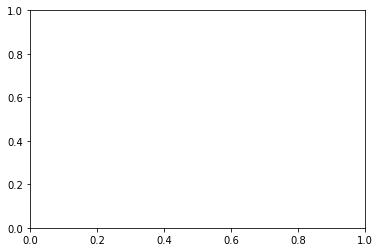

In [85]:
from matplotlib.mlab import cohere
# graph
import matplotlib.pyplot as plt
limit = 80; start = 2; step=8;
x = range(start, limit, step)
plt.plot(x, coherence_lda)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc= 'best')
plt.show()

# Obtain top words for topics

In [86]:
for i in range(25):
  print(int(topics[i][0])+1)
  topic = model.show_topic(i, topn=30)
  print(topic)

NameError: ignored

# Visualize  Topics

In [87]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1ba04f3a97d3e8cf6788bec16804fca9848f2982b929ddff081b671252c8ccb6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=89005ff2566c031e2392b6c5f2408dd1996e1f1352a285afe39f91935e557949
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [91]:
import pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
#import pyLDAvis.gensim
import pickle 

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.216755  0.037098       1        1  17.561335
2     -0.214683  0.062773       2        1  15.902995
22    -0.219143  0.053240       3        1  11.833286
10    -0.216076  0.025801       4        1  11.684722
17    -0.227842  0.017537       5        1  11.631242
1     -0.221786  0.040586       6        1  10.530248
24    -0.220351  0.015927       7        1   7.795144
11    -0.218125  0.055047       8        1   5.238479
19    -0.231891  0.081946       9        1   3.384519
7     -0.191311  0.079088      10        1   2.195963
0     -0.140182 -0.339086      11        1   1.019504
20    -0.093608 -0.222019      12        1   0.183339
5      0.248630 -0.115832      13        1   0.159636
16     0.304265 -0.040510      14        1   0.149334
13     0.249479 -0.108801      15        1   0.137252
21     0.237509 -0.129067      16        1   0.116024
9     -0.055238 -0.293063      17        1   0.113244
8      0.259718 -0.003338      18        1   0.089343
12     0.269812  0.068127      19        1   0.056842
4      0.303529  0.069431      20        1   0.053964
23     0.162428  0.139837      21        1   0.034900
14     0.107905  0.126319      22        1   0.032172
6      0.107905  0.126319      23        1   0.032172
18     0.107905  0.126319      24        1   0.032172
3      0.107905  0.126319      25        1   0.032172, topic_info=   Term         Freq        Total Category  logprob  loglift
8     e  6729.000000  6729.000000  Default  30.0000  30.0000
7     d  1946.000000  1946.000000  Default  29.0000  29.0000
19    t  5526.000000  5526.000000  Default  28.0000  28.0000
15    o  4783.000000  4783.000000  Default  27.0000  27.0000
3     I  3439.000000  3439.000000  Default  26.0000  26.0000
..  ...          ...          ...      ...      ...      ...
24    '     0.328151   399.826728  Topic25  -4.2627   0.9365
25    ,     0.328151   646.394177  Topic25  -4.2627   0.4561
26    g     0.328151  1173.897569  Topic25  -4.2627  -0.1405
27    j     0.328151   277.291036  Topic25  -4.2627   1.3025
28    m     0.328151  1549.775459  Topic25  -4.2627  -0.4183

[1244 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.176097     
0         2  0.192324     
0         3  0.124601     
0         4  0.119716     
0         5  0.128823     
...     ...       ...  ...
55        7  0.304078    ✡
56        7  0.304078    ️
67       21  0.694515    🏻
60        7  0.304078    👽
57        7  0.304078    💅

[288 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 3, 23, 11, 18, 2, 25, 12, 20, 8, 1, 21, 6, 17, 14, 22, 10, 9, 13, 5, 24, 15, 7, 19, 4])

# Summary
## Increasing n_components cover more topics and also increase the top words that helps to get the deeper meaning of the topics